In [1]:
def read_file(f):
    data = {}
    with open(f, "r+") as file:
        all_lines = file.readlines()
    for i in range(0,len(all_lines)):
#         print(all_lines[i])
#         print()
        if "CONTAINER ID" not in all_lines[i]:
            line_values = all_lines[i].split(" ")
#             print(line_values)
            line_values = [x for x in line_values if x != '']
#             print(line_values)
            name = line_values[1]
            if name not in data.keys():
                data[name] = {}
            if 'cpu' not in data[name].keys():
                data[name]['cpu'] = []
            data[name]['cpu'].append(line_values[2])
            if 'mem' not in data[name].keys():
                data[name]['mem'] = []
            data[name]['mem'].append(line_values[6])
            if 'network_i' not in data[name].keys():
                data[name]['network_i'] = []
            data[name]['network_i'].append(line_values[7])
            if 'network_o' not in data[name].keys():
                data[name]['network_o'] = []
            data[name]['network_o'].append(line_values[9])

    return data            

In [2]:
allreduce_6 = read_file("results/6workers/allreduce.csv")
grouped_3_reduce_6 = read_file("results/6workers/grouped-reduce-3.csv")
grouped_2_reduce_6 = read_file("results/6workers/grouped-reduce-2.csv")
grouped_1_reduce_6 = read_file("results/6workers/grouped-reduce-1.csv")
grouped_1_reduce_6_32_epochs = read_file("results/6workers/grouped-reduce-1-epochs-32.csv")

In [4]:
def get_network_activity_sum(data):
    s_i = 0.0
    for each_container in data.keys():
        for x in data[each_container]['network_i']:
            if len(x)>2:
                if 'kB' in x:
                    s_i = s_i + (0.001) * float(x[:-2])
                else:
                        s_i = s_i + float(x[:-2])
    s_o = 0.0
    for each_container in data.keys():
        for x in data[each_container]['network_o']:
            if len(x)>2:
                if 'kB' in x:
                    s_o = s_o + (0.001) * float(x[:-2])
                else:
                        s_o = s_o + float(x[:-2])
    return s_i, s_o

In [5]:
y1 = []
y2 = []

In [6]:
net_allreduce = get_network_activity_sum(allreduce_6)
net_allreduce
y1.append(net_allreduce[0])
y2.append(net_allreduce[1])

In [7]:
net_3reduce = get_network_activity_sum(grouped_3_reduce_6)
net_3reduce
y1.append(net_3reduce[0])
y2.append(net_3reduce[1])

In [8]:
net_2reduce = get_network_activity_sum(grouped_2_reduce_6)
net_2reduce
y1.append(net_2reduce[0])
y2.append(net_2reduce[1])

In [9]:
net_1reduce = get_network_activity_sum(grouped_1_reduce_6)
net_1reduce
y1.append(net_1reduce[0])
y2.append(net_1reduce[1])

In [10]:
net_1reduce_32_epochs = get_network_activity_sum(grouped_1_reduce_6_32_epochs)
net_1reduce_32_epochs
y1.append(net_1reduce_32_epochs[0])
y2.append(net_1reduce_32_epochs[1])

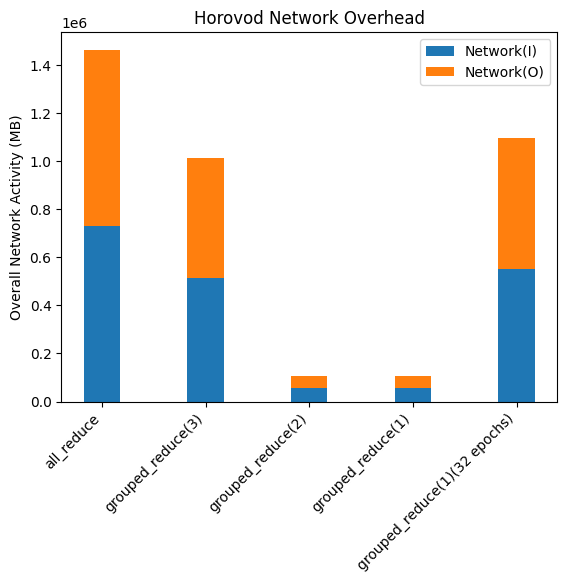

In [11]:
import matplotlib.pyplot as plt
labels = ['all_reduce', 'grouped_reduce(3)', 'grouped_reduce(2)', 'grouped_reduce(1)', 'grouped_reduce(1)(32 epochs)']
men_means = [20, 35, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]
men_std = [2, 3, 4, 1, 2]
women_std = [3, 5, 2, 3, 3]
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, y1, width, label='Network(I)')
ax.bar(labels, y2, width, bottom=y1, label='Network(O)')

ax.set_ylabel('Overall Network Activity (MB)')
ax.set_title('Horovod Network Overhead')
ax.legend()

plt.xticks(rotation=45, ha='right')
plt.show()

In [15]:
def get_network_activity(data, category):
    s_i = 0.0
    s_o = 0.0
    if category == "workers":
        for each in data.keys():
            if 'worker' in each:
                for x in data[each]['network_i']:
                    if len(x)>2:
                        if 'kB' in x:
                            s_i = s_i + (0.001) * float(x[:-2])
                        else:
                            s_i = s_i + float(x[:-2])
                for x in data[each]['network_i']:
                    if len(x)>2:
                        if 'kB' in x:
                            s_o = s_o + (0.001) * float(x[:-2])
                        else:
                            s_o = s_o + float(x[:-2])
    return s_i, s_o

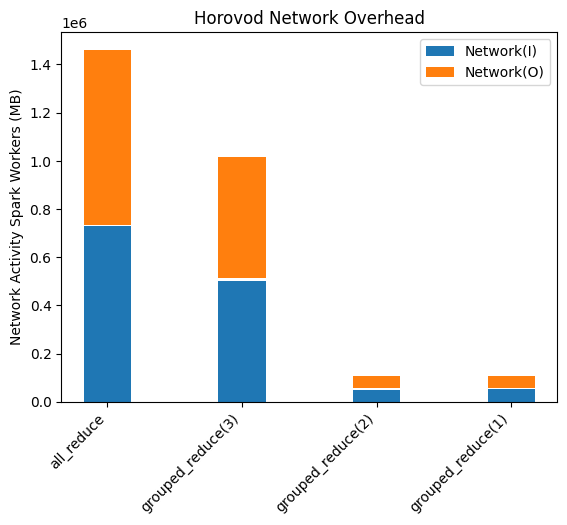

In [16]:
y1_1 = []
y2_1 = []
net_allreduce = get_network_activity(allreduce_6, 'workers')
y1_1.append(net_allreduce[0])
y2_1.append(net_allreduce[1])
net_3reduce = get_network_activity(grouped_3_reduce_6, 'workers')
y1_1.append(net_3reduce[0])
y2_1.append(net_3reduce[1])
net_2reduce = get_network_activity(grouped_2_reduce_6, 'workers')
y1_1.append(net_2reduce[0])
y2_1.append(net_2reduce[1])
net_1reduce = get_network_activity(grouped_1_reduce_6, 'workers')
y1_1.append(net_1reduce[0])
y2_1.append(net_1reduce[1])
import matplotlib.pyplot as plt
labels = ['all_reduce', 'grouped_reduce(3)', 'grouped_reduce(2)', 'grouped_reduce(1)']
men_means = [20, 35, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]
men_std = [2, 3, 4, 1, 2]
women_std = [3, 5, 2, 3, 3]
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, y1_1, width, label='Network(I)')
ax.bar(labels, y2_1, width, bottom=y1, label='Network(O)')

ax.set_ylabel('Network Activity Spark Workers (MB)')
ax.set_title('Horovod Network Overhead')
ax.legend()

plt.xticks(rotation=45, ha='right')
plt.show()